####Load data:

A quick look at the batters dataset and it's data fields - their distributions and their relationships.

Add BMI field to data

In [9]:
def bmi(height, weight):
    # Convert from pounds, inches to kg, m
    return weight*0.45 / (height*0.025)**2

with open('../data/baseball_data.csv', mode='r') as csvfile:
    with open('../data/baseball_new_data.csv', 'w') as csvoutput:
        w = csv.writer(csvoutput, lineterminator='\n')
        r = csv.reader(csvfile)
        heds = r.next()
        heds.append('BMI')
        w.writerow(heds)
        for item in r:
            item.append(bmi(float(item[2]), float(item[3])))
            w.writerow(item)

In [32]:
import csv
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy.stats.stats import pearsonr, spearmanr
%matplotlib inline
import pprint
with open('../data/baseball_new_data.csv', mode='r') as csvfile:
    reader = csv.reader(csvfile)
    # Ignore headers
    headers = reader.next()
    data = list(reader)
print headers

['name', 'handedness', 'height', 'weight', 'avg', 'HR', 'BMI']


####Handedness distribution:

([<matplotlib.axis.XTick at 0x1062eedd0>,
 <a list of 3 Text xticklabel objects>)

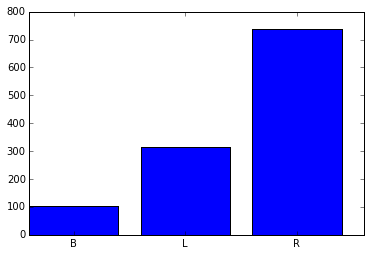

In [11]:
unique, counts = np.unique([i[1] for i in data], return_counts=True)
plt.figure()
plt.bar([0,1,2], counts)
plt.xticks([0.4,1.4,2.4], unique)

####Height distribution:

1157


(array([   1.,    2.,    4.,   11.,   41.,  112.,  145.,  232.,  194.,
         180.,  121.,   66.,   30.,   11.,    7.]),
 array([ 65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
         76.,  77.,  78.,  79.,  80.]),
 <a list of 15 Patch objects>)

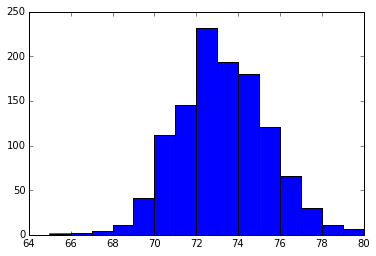

In [12]:
heights = np.array([float(i[2]) for i in data])
print len(heights)
plt.figure()
plt.hist(heights, bins=15)

####Weight distribution:

1157


(array([   1.,   13.,   70.,   67.,  110.,  269.,  161.,  242.,   80.,
          58.,   59.,   16.,    8.,    2.,    1.]),
 array([ 140.,  147.,  154.,  161.,  168.,  175.,  182.,  189.,  196.,
         203.,  210.,  217.,  224.,  231.,  238.,  245.]),
 <a list of 15 Patch objects>)

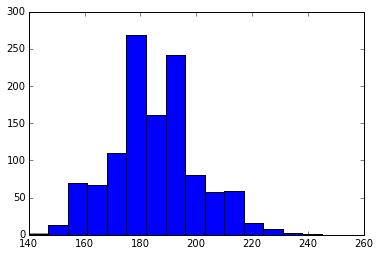

In [13]:
weights = np.array([float(i[3]) for i in data])
print len(weights)
plt.figure()
plt.hist(weights, bins=15)

####Avg distribution:

(array([   1.,    0.,    0.,    0.,    1.,    4.,    6.,    7.,    7.,
           2.,   10.,    9.,    3.,    3.,   11.,   17.,   29.,   53.,
          70.,  113.,  130.,  137.,  105.,   76.,   52.,   26.,   10.,
           7.,    1.,    1.]),
 array([ 0.066     ,  0.07473333,  0.08346667,  0.0922    ,  0.10093333,
         0.10966667,  0.1184    ,  0.12713333,  0.13586667,  0.1446    ,
         0.15333333,  0.16206667,  0.1708    ,  0.17953333,  0.18826667,
         0.197     ,  0.20573333,  0.21446667,  0.2232    ,  0.23193333,
         0.24066667,  0.2494    ,  0.25813333,  0.26686667,  0.2756    ,
         0.28433333,  0.29306667,  0.3018    ,  0.31053333,  0.31926667,
         0.328     ]),
 <a list of 30 Patch objects>)

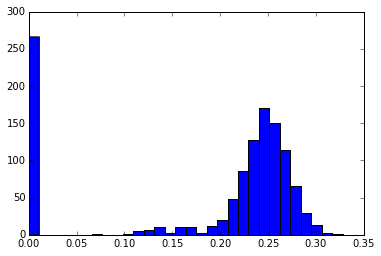

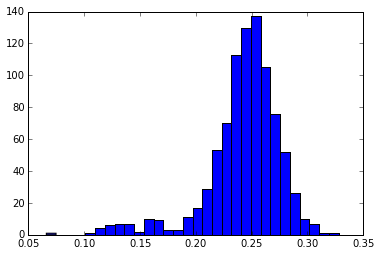

In [14]:
avg = [float(i[4]) for i in data]

avgplt = np.array([float(i[4]) for i in data])
plt.figure()
plt.hist(avgplt, bins=30)

## A lot of zeros
avgnonzero = np.array(filter(lambda a: a > 0.0, avg))
plt.figure()
plt.hist(avgnonzero, bins=30)

####Weight distribution

(array([ 524.,    3.,   26.,   26.,   11.,  488.,   12.,   25.,   42.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 9 Patch objects>)

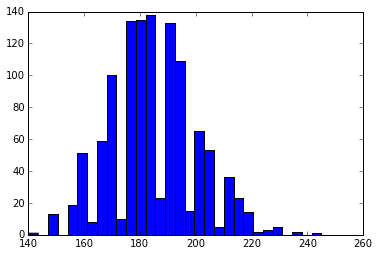

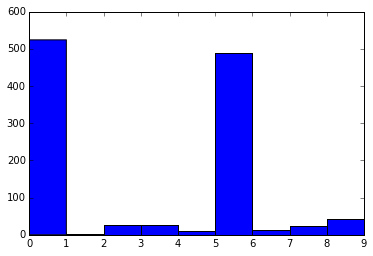

In [15]:
weights = np.array([int(i[3]) for i in data])
plt.figure()
plt.hist(weights, bins=30)

## Quite a few rounded values divisible by 5 or 10:
weights = np.array([int(i[3]) % 10 for i in data])
plt.figure()
plt.hist(weights, bins=9)

####HR Distribution:

(array([ 798.,  128.,   84.,   47.,   30.,   24.,   17.,    7.,    6.,
           6.,    4.,    2.,    2.,    0.,    2.]),
 array([   0.        ,   37.53333333,   75.06666667,  112.6       ,
         150.13333333,  187.66666667,  225.2       ,  262.73333333,
         300.26666667,  337.8       ,  375.33333333,  412.86666667,
         450.4       ,  487.93333333,  525.46666667,  563.        ]),
 <a list of 15 Patch objects>)

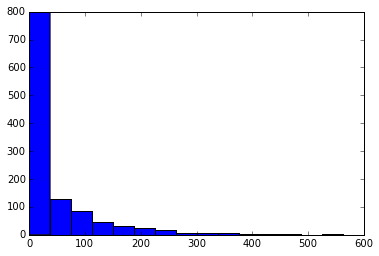

In [16]:
hr = np.array([float(i[5]) for i in data])
plt.figure()
plt.hist(hr, bins=15)

####BMI distribution:

(array([   4.,   14.,   37.,   79.,  120.,  206.,  210.,  189.,  183.,
          63.,   34.,   10.,    7.,    0.,    1.]),
 array([ 20.2664665 ,  21.01019119,  21.75391588,  22.49764057,
         23.24136526,  23.98508995,  24.72881464,  25.47253933,
         26.21626402,  26.9599887 ,  27.70371339,  28.44743808,
         29.19116277,  29.93488746,  30.67861215,  31.42233684]),
 <a list of 15 Patch objects>)

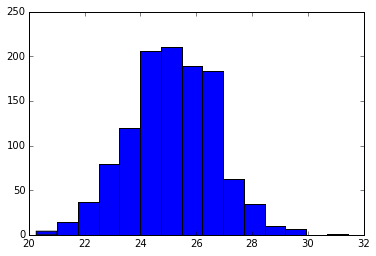

In [17]:
bmi = np.array([float(i[6]) for i in data])
plt.figure()
plt.hist(bmi, bins=15)

####BMI VS AVG

(0.038618813166353225, 0.24949849642405392)


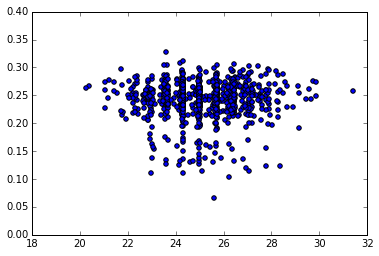

In [39]:
nonzerodata = np.array(filter(lambda a: float(a[4]) > 0.0, data))
bmi = [float(i[6]) for i in nonzerodata]
avg = [float(i[4]) for i in nonzerodata]
plt.figure()
plt.scatter(bmi, avg)

print spearmanr(bmi, avg)

####BMI VS HR

(0.14078104882867437, 3.050730660260643e-05)
(0.19380239808865921, 8.1091326115456837e-09)


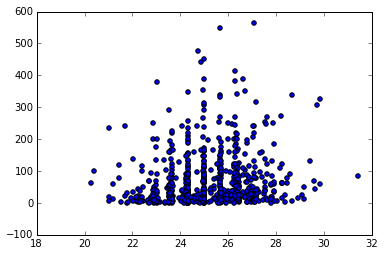

In [37]:
nonzerodata = np.array(filter(lambda a: float(a[5]) > 0.0, data))
bmi = [float(i[6]) for i in nonzerodata]
hr = [float(i[5]) for i in nonzerodata]
plt.figure()
plt.scatter(bmi, hr)

print spearmanr(bmi, hr)